In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [155]:
df = pd.read_csv("combined_energy_data.csv", low_memory=False)

In [156]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [158]:
df = df[df.Consumption.notnull()]

In [122]:
#ac_df = pd.read_csv("energy-ile-de-france.txt", sep=',',header = None,names=['timestamp','wind'])

In [123]:
#ac_df['datetime'] = pd.to_datetime(ac_df['timestamp'],unit='ms')

In [160]:
df.columns

Index(['Perimeter', 'Nature', 'Dated', 'Hours', 'Consumption', 'Forecast D-1',
       'Forecast J', 'Fuel oil', 'Coal', 'Gas', 'Nuclear', 'Wind', 'Solar',
       'Hydraulic', 'Pumping', 'Bioenergies', 'Ech. physical', 'Co2 rate',
       'Ech. comm. England', 'Ech. comm. Spain', 'Ech. comm. Italy',
       'Ech. comm. Swiss', 'Ech. comm. Germany-Belgium', 'Fuel oil - TAC',
       'Fuel oil - Cogen.', 'Fuel oil - Others', 'Gas - TAC', 'Gas - Cogen.',
       'Gas - CCG', 'Gas - Others', 'Hydraulic - Stream of water + lock',
       'Hydraulics - Lakes', 'Hydraulics - STEP turbines',
       'Bioenergies - Waste', 'Bioenergies - Biomass', 'Bioenergies - Biogas',
       'datetime', 'guitrancourt_Speed(m/s)', 'guitrancourt_Direction (deg N)',
       'lieusaint_Speed(m/s)', 'lieusaint_Direction (deg N)',
       'lvs-pussay_Speed(m/s)', 'lvs-pussay_Direction (deg N)',
       'parc-du-gatinais_Speed(m/s)', 'parc-du-gatinais_Direction (deg N)',
       'arville_Speed(m/s)', 'arville_Direction (deg N

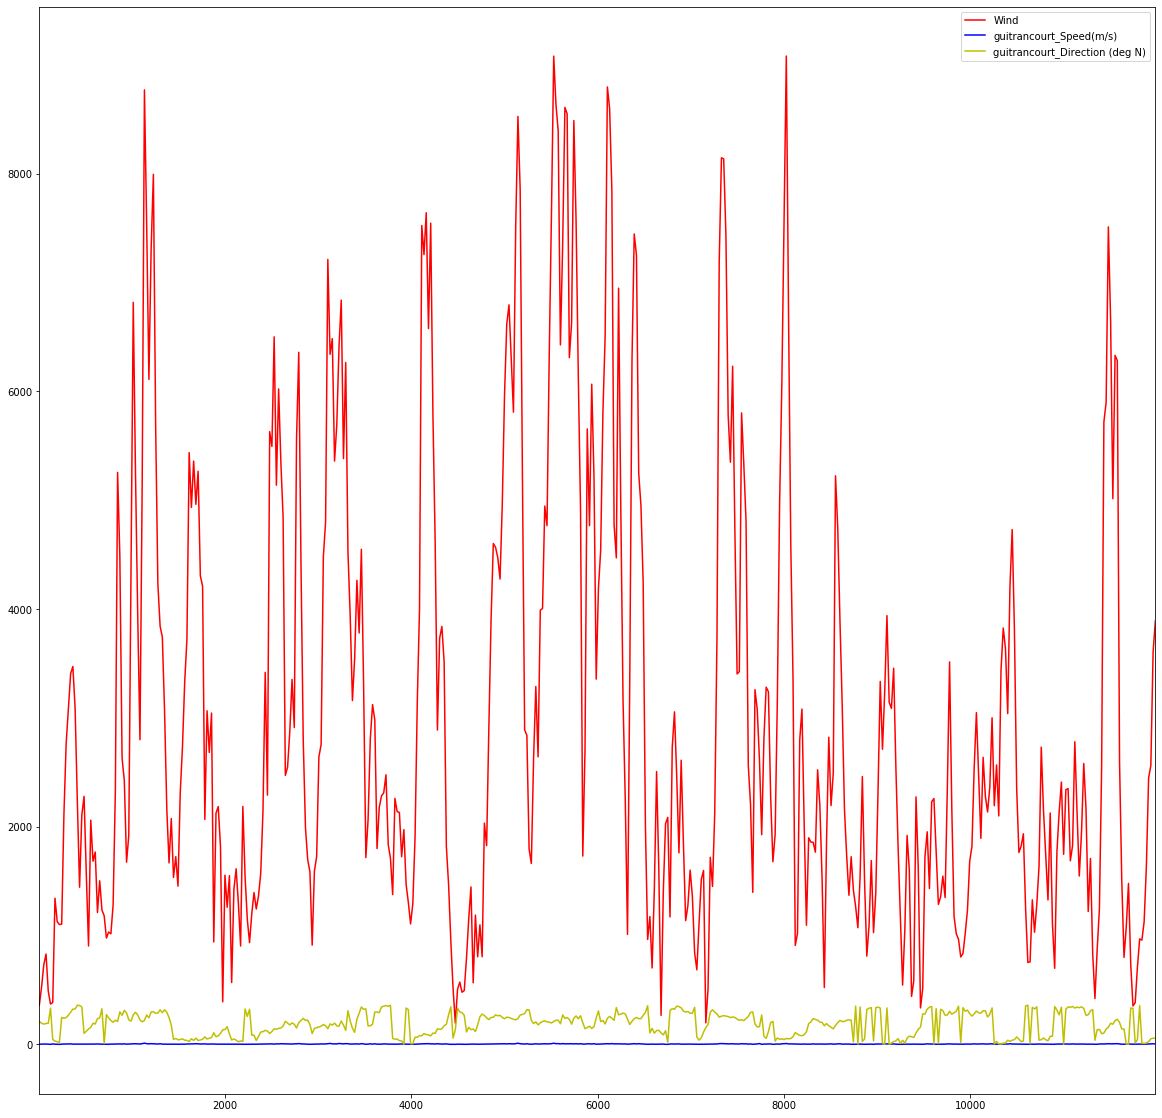

In [73]:
df[df['guitrancourt_Speed(m/s)'].notnull()].head(500)[['Wind','guitrancourt_Speed(m/s)', 'guitrancourt_Direction (deg N)']].astype(float).plot(style=['r','b','y'],figsize=(20,20))

In [161]:
columns_use = ['datetime', 'guitrancourt_Speed(m/s)', 'guitrancourt_Direction (deg N)',
       'lieusaint_Speed(m/s)', 'lieusaint_Direction (deg N)',
       'lvs-pussay_Speed(m/s)', 'lvs-pussay_Direction (deg N)',
       'parc-du-gatinais_Speed(m/s)', 'parc-du-gatinais_Direction (deg N)',
       'arville_Speed(m/s)', 'arville_Direction (deg N)',
       'boissy-la-riviere_Speed(m/s)', 'boissy-la-riviere_Direction (deg N)',
       'angerville-1_Speed(m/s)', 'angerville-1_Direction (deg N)',
       'angerville-2_Speed(m/s)', 'angerville-2_Direction (deg N)',
       'guitrancourt-b_Speed(m/s)', 'guitrancourt-b_Direction (deg N)',
       'lieusaint-b_Speed(m/s)', 'lieusaint-b_Direction (deg N)',
       'lvs-pussay-b_Speed(m/s)', 'lvs-pussay-b_Direction (deg N)',
       'parc-du-gatinais-b_Speed(m/s)', 'parc-du-gatinais-b_Direction (deg N)',
       'arville-b_Speed(m/s)', 'arville-b_Direction (deg N)',
       'boissy-la-riviere-b_Speed(m/s)',
       'boissy-la-riviere-b_Direction (deg N)', 'angerville-1-b_Speed(m/s)',
       'angerville-1-b_Direction (deg N)', 'angerville-2-b_Speed(m/s)',
       'angerville-2-b_Direction (deg N)']

In [162]:
agg_df = df[['datetime','Wind']].groupby([df['datetime'].dt.floor('H')]).agg(['mean','sum','std'])

In [163]:
agg_df.columns = agg_df.columns.map('_'.join)

In [164]:
agg_df = agg_df.reset_index()

In [167]:
merge_df = agg_df.merge(df[columns_use], how='left', on='datetime')

In [168]:
merge_df.head(100)

,datetime,Wind_mean,Wind_sum,Wind_std,guitrancourt_Speed(m/s),guitrancourt_Direction (deg N),lieusaint_Speed(m/s),lieusaint_Direction (deg N),lvs-pussay_Speed(m/s),lvs-pussay_Direction (deg N),...,parc-du-gatinais-b_Speed(m/s),parc-du-gatinais-b_Direction (deg N),arville-b_Speed(m/s),arville-b_Direction (deg N),boissy-la-riviere-b_Speed(m/s),boissy-la-riviere-b_Direction (deg N),angerville-1-b_Speed(m/s),angerville-1-b_Direction (deg N),angerville-2-b_Speed(m/s),angerville-2-b_Direction (deg N)
0,2016-12-31 22:00:00,289.0,578.0,31.112698,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-31 23:00:00,359.0,718.0,11.313708,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 00:00:00,357.0,714.0,4.242641,1.86,212.0,1.50,223.0,1.71,222.0,...,2.51,225.0,2.52,225.0,2.73,226.0,2.74,228.0,2.74,228.0
3,2017-01-01 01:00:00,340.5,681.0,0.707107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 02:00:00,384.0,768.0,11.313708,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-01-01 03:00:00,419.0,838.0,12.727922,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-01-01 04:00:00,436.5,873.0,6.363961,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-01-01 05:00:00,509.0,1018.0,26.870058,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-01-01 06:00:00,546.0,1092.0,26.870058,2.47,194.0,2.32,198.0,2.37,217.0,...,2.48,203.0,2.50,203.0,2.69,201.0,2.62,201.0,2.62,201.0
9,2017-01-01 07:00:00,592.0,1184.0,11.313708,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
merge_df = agg_df.merge(ac_df, how ='left', on='datetime')

In [132]:
merge_df.tail(500)

,datetime,Wind_mean,Wind_sum,timestamp,wind
30556,2020-06-27 02:00:00,2746.25,10985.0,1.593223e+12,18000.0
30557,2020-06-27 03:00:00,3007.00,12028.0,1.593227e+12,16500.0
30558,2020-06-27 04:00:00,3357.00,13428.0,1.593230e+12,13000.0
30559,2020-06-27 05:00:00,3535.75,14143.0,1.593234e+12,9000.0
30560,2020-06-27 06:00:00,4097.00,16388.0,1.593238e+12,11250.0
30561,2020-06-27 07:00:00,4754.00,19016.0,1.593241e+12,19000.0
30562,2020-06-27 08:00:00,5182.50,20730.0,1.593245e+12,20250.0
30563,2020-06-27 09:00:00,6129.75,24519.0,1.593248e+12,28000.0
30564,2020-06-27 10:00:00,6692.25,26769.0,1.593252e+12,36000.0
30565,2020-06-27 11:00:00,7315.50,29262.0,1.593256e+12,55500.0


In [ ]:
df